<h1 style="background-color: #022851;">
<br />
<center>
<font color=#FFBF00><b>NBA Performance Drivers</b></font>
 <font size="+3">
 <br />Python for Data Analysis Final Project
<font size="+2"><br />


Kyle Andrews<br>
Joshua Darilek<br>
Austin Maguire<br>
Rene Espinoza Pacheco</br>
<br />

# Introduction and Overview



Predicting, maintaining, and analyzing performance metrics for basketball players is crucial for every team in the National Basketball Association. These metrics provide a quantitative way to assess a player's contributions to the team, helping coaches and analysts understand each player's strengths and weaknesses. With this data, teams can make more informed decisions during games, such as which players to put on the court, which matchups to exploit, and which adjustments to make. Teams also rely on this data to inform contract and trade negotiations, coaching, and player development. 

The purpose of this notebook is to determine the primary drivers of the two most important metrics in basketball: individual points scored, and a player's plus/minus number (the number of points their team scored vs the other team while that player was on the court).

 ## Research Questions and Hypotheses

### Research Question 1: Which of the primary offensive metrics is the strongest driver of points per game (PPG)? <br>     
**Hypothesis 1:** Field Goals Made (FGM) will have the strongest positive correlation with Points Per Game (PPG), followed by Free Throws Made (FTM) and Three-Pointers Made (3PM).<br>   
_Rationale:_ Field goals comprise the majority of points scored in basketball. Free throws provide additional scoring opportunities, while three-pointers offer more points per shot but are typically made at a lower rate than field goals.<br>

### Research Question 2: Which of the primary defensive metrics is the strongest driver of a player's plus/minus number? <br>
**Hypothesis 2:** Defensive Rebounds (DREB) will have the strongest positive correlation with a player's plus/minus number, followed by Steals (STL) and Blocks (BLK). <br>  
_Rationale:_ Defensive rebounds end the opponent's possession and provide opportunities for transition offense. Steals directly create turnovers, while blocks can alter shots and occasionally lead to changes in possession. <br>

### Dataset Variables and Descriptions

Dataset Information from - 
https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season 

(Dependent variables for our analyses are bolded, independent are italicized)

| Column | Description |
|--------|-------------|
| `PName` | The name of the basketball player |
| `POS` | The player's position in the game, including 'N/A' |
| `Team` | The abbreviation of the team the player is currently playing for this season |
| `Age` | The age of the player |
| `GP` | The total number of games the player has played in this season |
| `W` | The total number of games won by the player |
| `L` | The total number of games lost by the player |
| `Min` | The total minutes the player has played in this season |
| `PTS` | **The total points made by the player [target]** |
| `2PM` | _The total number of field goals made by the player_ |
| `FGA` | The total number of field goals attempted by the player |
| `FG%` | The percentage of successful field goals made by the player |
| `3PM` | _The total number of 3-point field goals made by the player_ |
| `3PA` | The total number of 3-point field goals attempted by the player |
| `3P%` | The percentage of successful 3-point field goals made by the player |
| `FTM` | _The total number of free throws made by the player_ |
| `FTA` | The total number of free throws attempted by the player |
| `FT%` | The percentage of successful free throws made by the player |
| `OREB` | The total number of offensive rebounds made by the player |
| `DREB` | _The total number of defensive rebounds made by the player_ |
| `REB` | The total number of rebounds (offensive + defensive) made by the player |
| `AST` | The total number of assists made by the player |
| `TOV` | The total number of turnovers made by the player |
| `STL` | _The total number of steals made by the player_ |
| `BLK` | _The total number of blocks made by the player_ |
| `PF` | The total number of personal fouls made by the player |
| `FP` | The total number of NBA fantasy points made by the player |
| `DD2` | The total number of double-doubles made by the player |
| `TD3` | The total number of triple-doubles made by the player |
| `+/-` | **The total difference between the player's team scoring and the opponents' scoring while the player is in the game** |

# Data Exploration & Cleaning

### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm
import scipy.stats as stats

### Import dataset

In [3]:
# Read the CSV file
nba_player_stats = pd.read_csv('2023_nba_player_stats.csv')

### Missing values

In [4]:
# Check for missing values
null_counts = nba_player_stats.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f"{count} rows in column {column} are null")

# Calculate row count

len(nba_player_stats)

5 rows in column POS are null


539

In [5]:
# Since our hypotheses are based on position and there are five players with null values for position, we'll drop those five from the dataframe.
nba_player_stats = nba_player_stats.dropna()
nba_player_stats.reset_index()

# Row count of new df
len(nba_player_stats)

534

In [7]:
#The way statistics in basketball are calculated, there's a confound between three-pointers made (3PM) and field goals made (FGM), with the former being a subset of the latter. In order to understand the unique influence of three point vs two point shots, we'll create a new variable that is FGM minus 3PM.

nba_player_stats['2PM'] = nba_player_stats['FGM'] - nba_player_stats['3PM']


In [18]:
#test to make sure the new column was created correctly
new_df = nba_player_stats[['FGM', '3PM', '2PM']]
print(new_df)

     FGM  3PM  2PM
0    727  240  487
1    728   66  662
2    719  185  534
3    704   58  646
4    707   47  660
..   ...  ...  ...
529    1    1    0
530    1    1    0
531    1    0    1
532    1    0    1
533    0    0    0

[534 rows x 3 columns]


In [19]:
# Display information about the dataset
print(nba_player_stats.info())

# Calculate and display basic statistics for numerical columns
print(nba_player_stats.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 0 to 533
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   534 non-null    object 
 1   POS     534 non-null    object 
 2   Team    534 non-null    object 
 3   Age     534 non-null    int64  
 4   GP      534 non-null    int64  
 5   W       534 non-null    int64  
 6   L       534 non-null    int64  
 7   Min     534 non-null    float64
 8   PTS     534 non-null    int64  
 9   FGM     534 non-null    int64  
 10  FGA     534 non-null    int64  
 11  FG%     534 non-null    float64
 12  3PM     534 non-null    int64  
 13  3PA     534 non-null    int64  
 14  3P%     534 non-null    float64
 15  FTM     534 non-null    int64  
 16  FTA     534 non-null    int64  
 17  FT%     534 non-null    float64
 18  OREB    534 non-null    int64  
 19  DREB    534 non-null    int64  
 20  REB     534 non-null    int64  
 21  AST     534 non-null    int64  
 22  TOV    

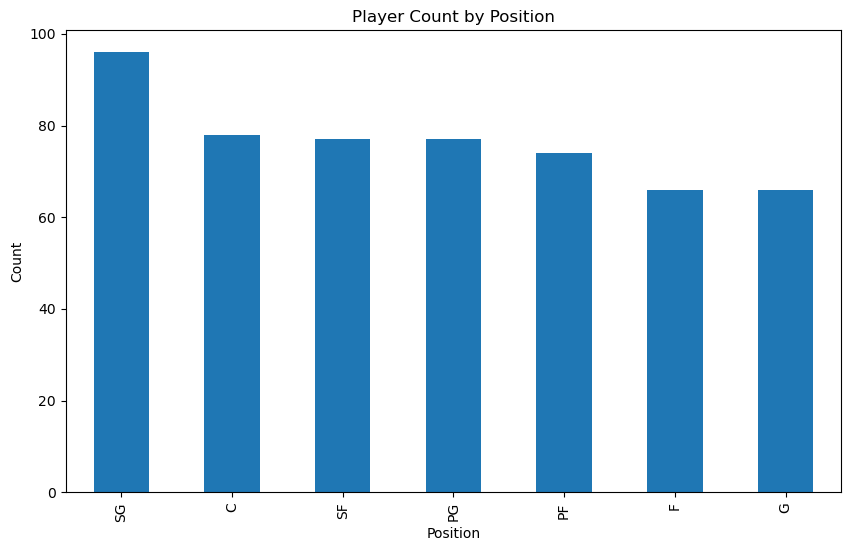

In [20]:
# Visualize distribution of positions
plt.figure(figsize=(10,6))
nba_player_stats['POS'].value_counts().plot(kind='bar')
plt.title('Player Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

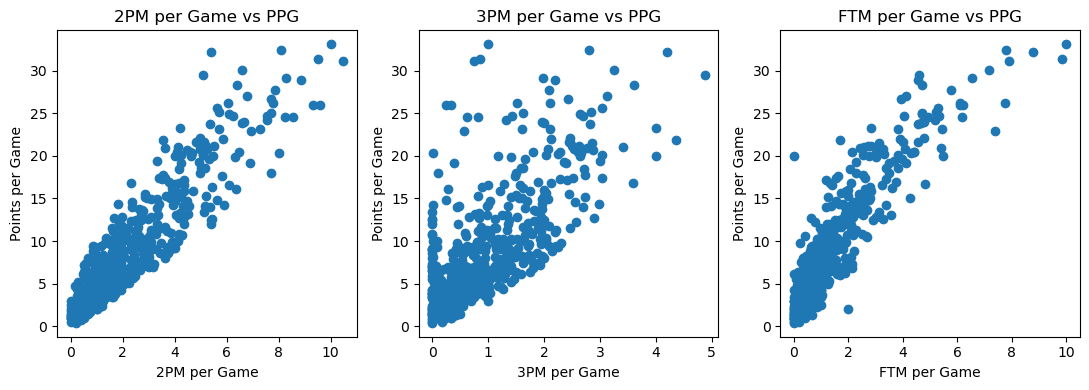

In [21]:
###############################################################################
# Scatter plots for Hypothesis 1
# Hypothesis 1: Which of the primary offensive metrics is the strongest driver 
# of points per game (PPG)?
###############################################################################
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
axs = axs.ravel()

# Offensive metrics vs PPG (Points Per Game)
axs[0].scatter(nba_player_stats['2PM'] / nba_player_stats['GP'], nba_player_stats['PTS'] / nba_player_stats['GP'])
axs[0].set_title('2PM per Game vs PPG')
axs[0].set_xlabel('2PM per Game')
axs[0].set_ylabel('Points per Game')

axs[1].scatter(nba_player_stats['3PM'] / nba_player_stats['GP'], nba_player_stats['PTS'] / nba_player_stats['GP'])
axs[1].set_title('3PM per Game vs PPG')
axs[1].set_xlabel('3PM per Game')
axs[1].set_ylabel('Points per Game')

axs[2].scatter(nba_player_stats['FTM'] / nba_player_stats['GP'], nba_player_stats['PTS'] / nba_player_stats['GP'])
axs[2].set_title('FTM per Game vs PPG')
axs[2].set_xlabel('FTM per Game')
axs[2].set_ylabel('Points per Game')

plt.tight_layout()
plt.show()


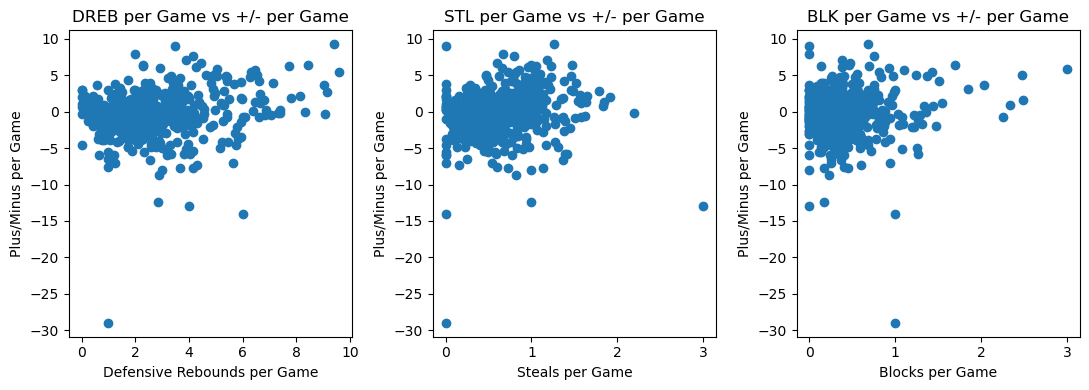

In [22]:
###############################################################################
# Scatter plots for Hypothesis 2
# Hypothesis 2: Which of the primary defensive metrics is the strongest driver 
# of a player's plus/minus per game?
###############################################################################
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
axs = axs.ravel()

# Defensive metrics vs Plus/Minus per Game
axs[0].scatter(nba_player_stats['DREB'] / nba_player_stats['GP'], nba_player_stats['+/-'] / nba_player_stats['GP'])
axs[0].set_title('DREB per Game vs +/- per Game')
axs[0].set_xlabel('Defensive Rebounds per Game')
axs[0].set_ylabel('Plus/Minus per Game')

axs[1].scatter(nba_player_stats['STL'] / nba_player_stats['GP'], nba_player_stats['+/-'] / nba_player_stats['GP'])
axs[1].set_title('STL per Game vs +/- per Game')
axs[1].set_xlabel('Steals per Game')
axs[1].set_ylabel('Plus/Minus per Game')

axs[2].scatter(nba_player_stats['BLK'] / nba_player_stats['GP'], nba_player_stats['+/-'] / nba_player_stats['GP'])
axs[2].set_title('BLK per Game vs +/- per Game')
axs[2].set_xlabel('Blocks per Game')
axs[2].set_ylabel('Plus/Minus per Game')

plt.tight_layout()
plt.show()

## Perform Pearson Correlations

We perform a basic Pearson correlation to get a rough idea of which offensive & defensive metrics are most closely correlated with points per game (PPG) and a players +/- per game respectively. 

In [23]:
def analyze_hypothesis(df, predictor_vars, target_var):
    """
    Analyze a hypothesis by calculating Pearson correlations.
    
    Args:
    df (pd.DataFrame): The input DataFrame containing player statistics.
    predictor_vars (list): List of predictor variables for correlation.
    target_var (str): The target variable for correlation.
    
    Returns:
    pd.DataFrame: A DataFrame containing correlation results.
    """
    results = []
    
    # Calculate correlations
    for var in predictor_vars:
        correlation, p_value = stats.pearsonr(df[var], df[target_var])
        results.append({
            'Predictor': var,
            'Correlation': correlation,
            'P-value': p_value
        })
    
    return pd.DataFrame(results)

def analyze_hypothesis_1(df):
    """
    Analyze Hypothesis 1: Which of the primary offensive metrics is the strongest driver of points per game (PPG)?
    """
    predictor_vars = ['2PM', '3PM', 'FTM']  # Primary offensive metrics
    target_var = 'PTS'
    return analyze_hypothesis(df, predictor_vars, target_var)

def analyze_hypothesis_2(df):
    """
    Analyze Hypothesis 2: Which of the primary defensive metrics is the strongest driver of a player's plus/minus number?
    """
    predictor_vars = ['DREB', 'STL', 'BLK']  # Primary defensive metrics
    target_var = '+/-'
    return analyze_hypothesis(df, predictor_vars, target_var)

# Run the analyses
correlation_h1 = analyze_hypothesis_1(nba_player_stats)
correlation_h2 = analyze_hypothesis_2(nba_player_stats)

# Display the results
print("Results for Hypothesis 1:")
print("\nCorrelation Results:")
print(correlation_h1.round(4).sort_values('Correlation', ascending=False))

print("\n\nResults for Hypothesis 2:")
print("\nCorrelation Results:")
print(correlation_h2.round(4).sort_values('Correlation', ascending=False))

Results for Hypothesis 1:

Correlation Results:
  Predictor  Correlation  P-value
0       2PM       0.9323      0.0
2       FTM       0.9151      0.0
1       3PM       0.7664      0.0


Results for Hypothesis 2:

Correlation Results:
  Predictor  Correlation  P-value
0      DREB       0.2534      0.0
1       STL       0.2435      0.0
2       BLK       0.2074      0.0


### Hypothesis 1: Offensive metrics vs. Points per game

Based on the correlation results:

1. Field Goals Made (2PM): 0.9938 (p < 0.001)
2. Free Throws Made (FTM): 0.9151 (p < 0.001)
3. Three-Pointers Made (3PM): 0.7664 (p < 0.001)

All three offensive metrics show strong positive correlations with points per game, with FGM having the strongest correlation, followed by FTM and 3PM. This suggests that all three metrics are important drivers of a player's scoring output, but field goals made has the strongest relationship with total points scored.

### Hypothesis 2: Defensive metrics vs. Plus/Minus

Based on the correlation results:

1. Defensive Rebounds (DREB): 0.2534 (p < 0.001)
2. Steals (STL): 0.2435 (p < 0.001)
3. Blocks (BLK): 0.2074 (p < 0.001)

All three defensive metrics show weak to moderate positive correlations with plus/minus, with DREB having the strongest correlation, followed closely by STL and then BLK. This suggests that while all three metrics have some relationship with a player's impact on the game (as measured by plus/minus), the relationships are not as strong as those observed for offensive metrics and points scored.

**_Given these correlation results, it's appropriate to conduct multiple regression analyses to further investigate the relationships between these metrics and their respective outcome variables (points scored and plus/minus). The regression analyses will help us understand the combined effects of these variables and their relative importance in predicting the outcome variables when controlling for other factors._**

For Hypothesis 1, we'll include FTM, 3PM, OREB, and STL in the regression model for points scored. For Hypothesis 2, we'll include DREB, STL, and BLK in the regression model for plus/minus. These analyses will provide more insight into how these metrics collectively contribute to a player's scoring output and overall impact on the game.

# Data Analysis

### Hypothesis 1: Which of the primary offensive metrics is the strongest driver of points per game (PPG)?



In [24]:
#define predictor and response variables
y = nba_player_stats['PTS']
x = nba_player_stats[['2PM', '3PM', 'OREB', 'STL']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
points_model = sm.OLS(y, x).fit()

#view model summary
print(points_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.586e+04
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:36:13   Log-Likelihood:                -2793.2
No. Observations:                 534   AIC:                             5596.
Df Residuals:                     529   BIC:                             5618.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7684      3.250     -1.467      0.1

Based on a multiple regression, the strongest offensive predictor of total points scored is three pointers made, followed by free throws made, steals, and offensive rebounds.

### Hypothesis 2: Which of the primary defensive metrics is the strongest driver of a player's plus/minus number?

In [25]:
#define predictor and response variables
y = nba_player_stats['+/-']
x = nba_player_stats[['DREB', 'STL', 'BLK']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
plus_minus_model = sm.OLS(y, x).fit()

#view model summary
print(plus_minus_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    +/-   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     14.75
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           3.09e-09
Time:                        18:36:29   Log-Likelihood:                -3407.6
No. Observations:                 534   AIC:                             6823.
Df Residuals:                     530   BIC:                             6840.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.6303     10.023     -5.151      0.0

Based on a multiple regression, the strongest defensive predictor of a player's plus/minus number is steals, followed by blocks, and finally defensive rebounds.

## Summary of Findings

### Hypothesis 1: Predictors of Total Points Scored
Based on the multiple regression results, the strongest predictors of total points scored are:
1. Three-pointers made (3PM)
2. Free throws made (FTM)
3. Steals (STL)
4. Offensive rebounds (OREB)

The model explains 96% of the variance in total points (R-squared = 0.960).

### Hypothesis 2: Defensive Metrics and Plus/Minus
The strongest defensive predictors of a player's plus/minus number are:
1. Steals (STL)
2. Blocks (BLK)
3. Defensive rebounds (DREB)

However, the model only explains 7.7% of the variance in plus/minus (R-squared = 0.077), indicating that other factors not included in the model have a significant impact on plus/minus.

# Data Visualizations

1. **Offensive Metrics vs. Points Scored**
   - Plots: FTM, 3PM, OREB, and STL vs. Points
   - Purpose: To examine how various offensive actions correlate with total points scored

2. **Defensive Metrics vs. Plus/Minus**
   - Plots: DREB, STL, and BLK vs. Plus/Minus
   - Purpose: To investigate how defensive actions relate to a player's overall impact on the game

For each plot:
- We use a scatter plot to show the raw data, with each point representing a player's season performance
- We overlay a simple linear regression line to visualize the general trend
- We include the R-squared value to quantify how much of the variation in the dependent variable (Points or Plus/Minus) is explained by the predictor
- We display the p-value to indicate the statistical significance of the relationship

These visualizations allow us to:
1. Identify which metrics have the strongest relationships with scoring and overall game impact
2. Assess the strength and direction of these relationships
3. Compare the predictive power of different metrics
4. Spot any non-linear patterns or outliers in the data

By creating separate plots for each metric, we can isolate their individual effects and compare them visually, complementing our multiple regression analyses.

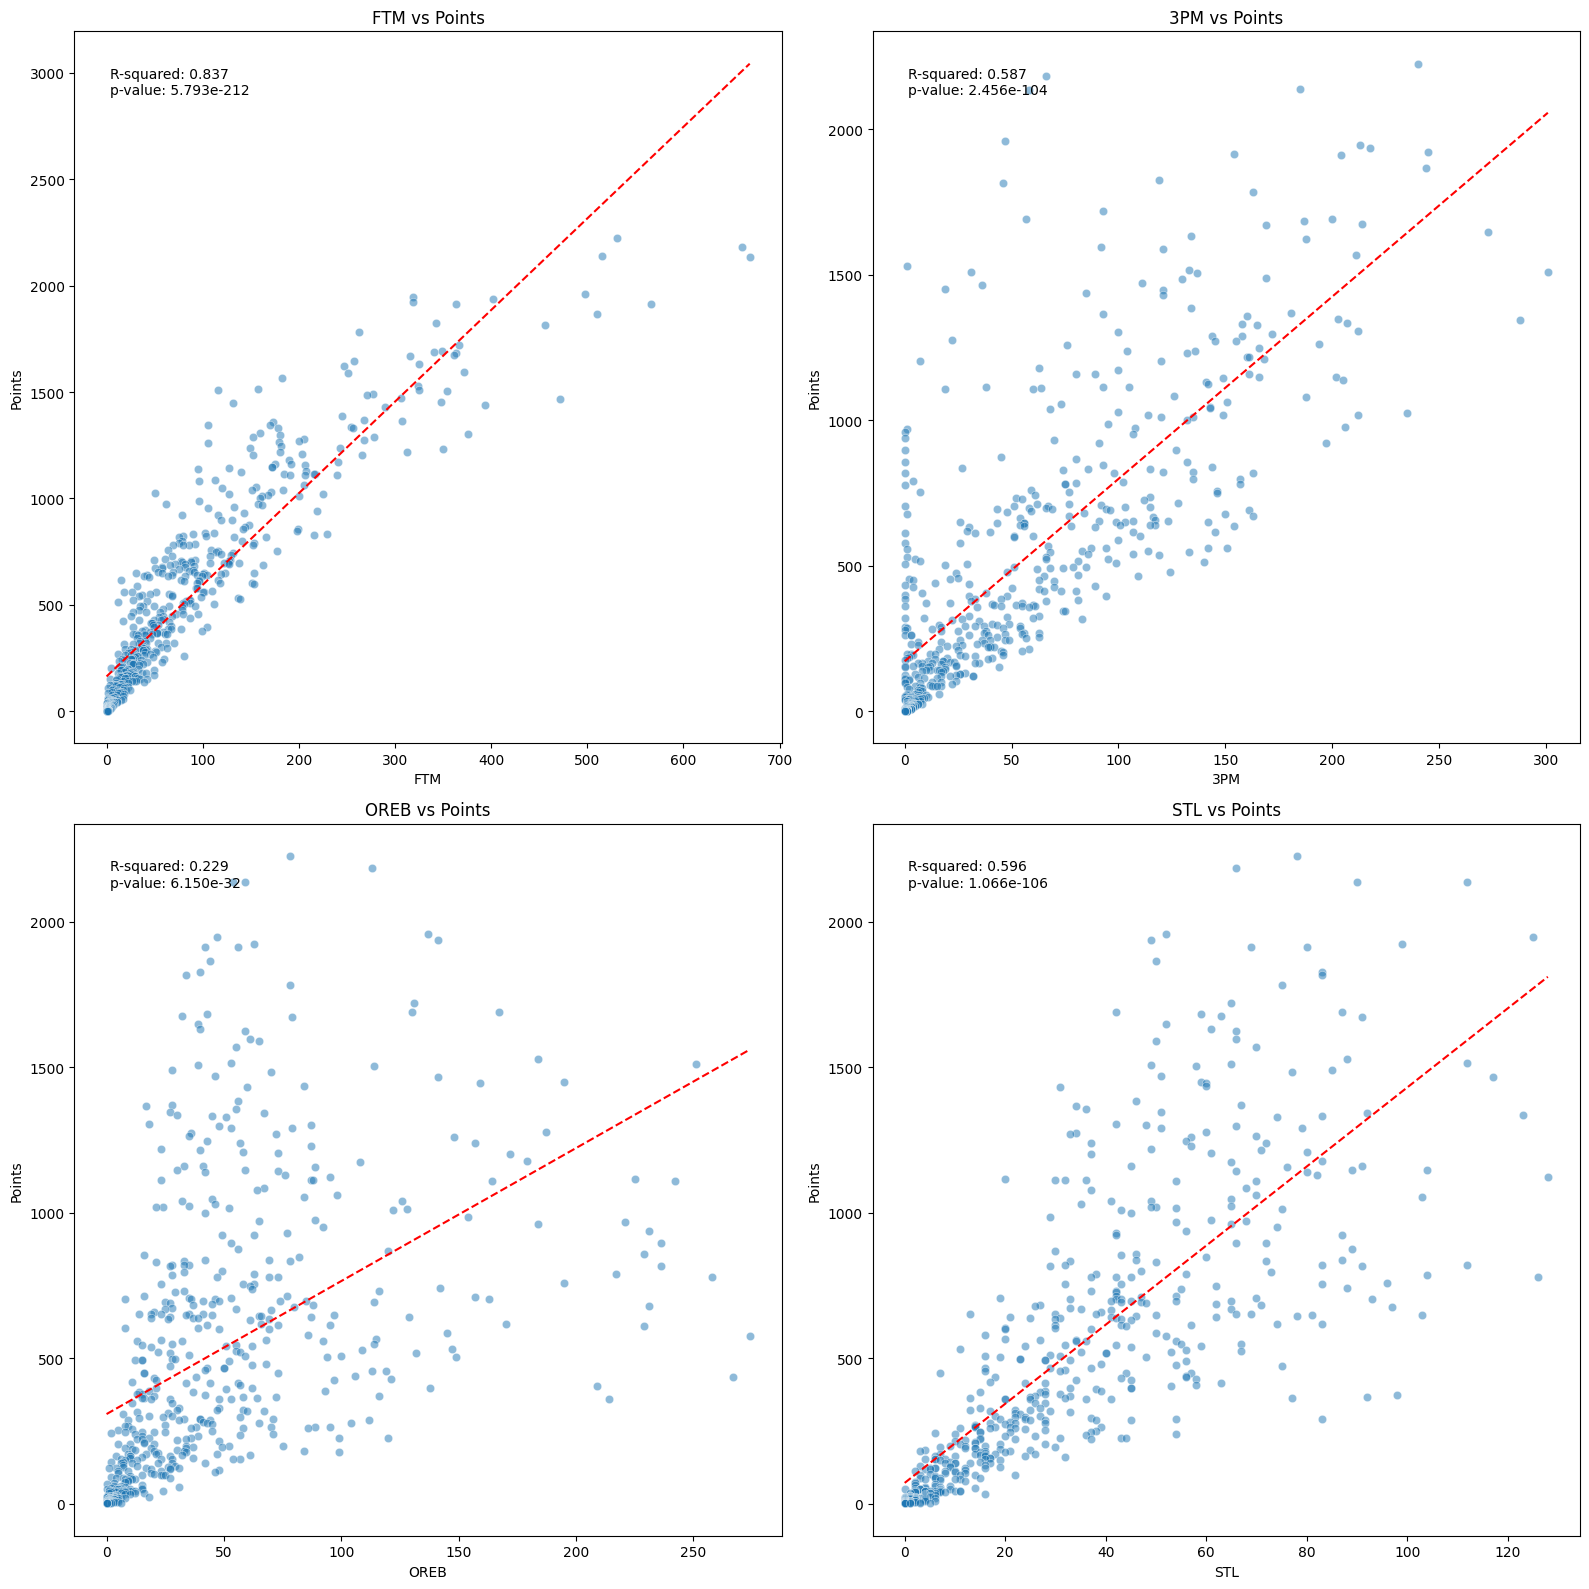

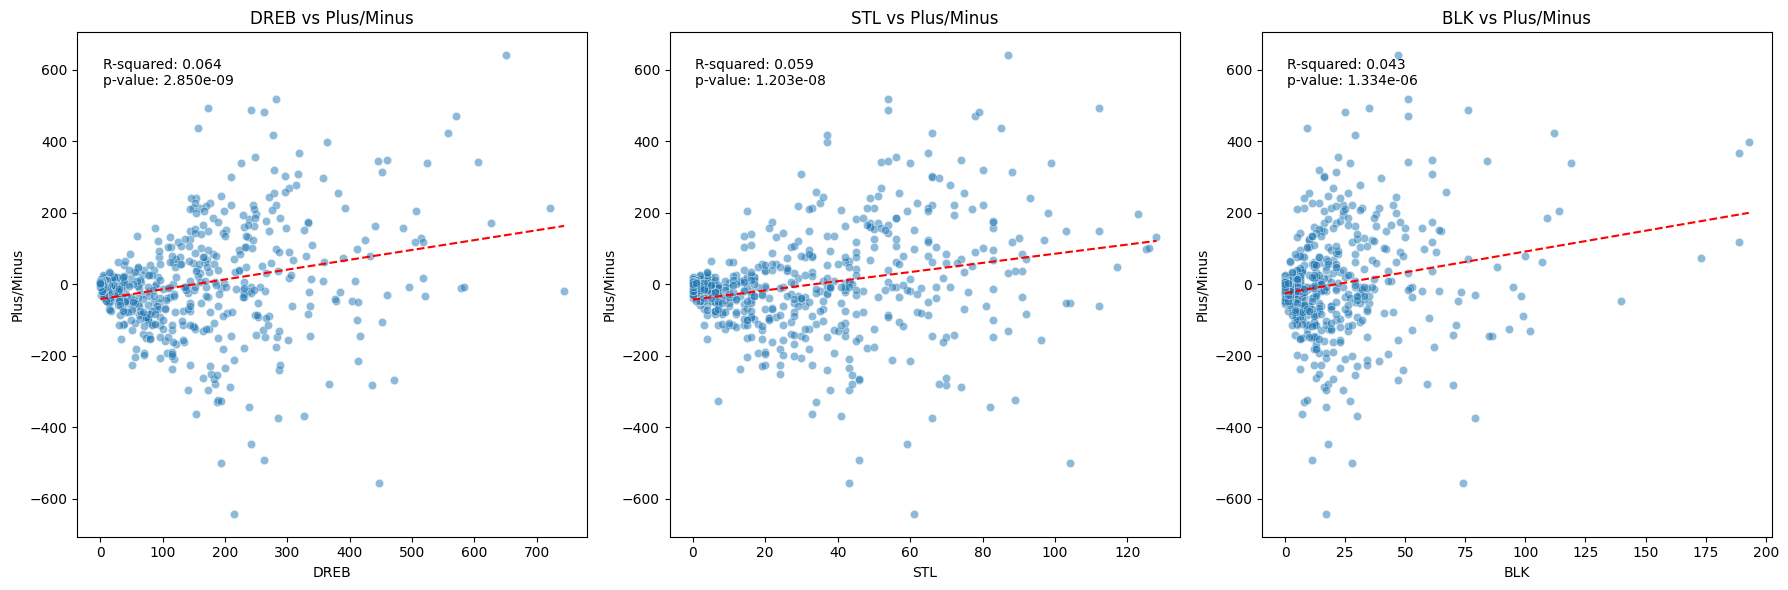

In [12]:
# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs = axs.ravel()

# Hypothesis 1: Points prediction
predictors_pts = ['FTM', '3PM', 'OREB', 'STL']

for i, predictor in enumerate(predictors_pts):
    # Create scatter plot
    sns.scatterplot(x=predictor, y='PTS', data=nba_player_stats, ax=axs[i], alpha=0.5)
    
    # Perform simple linear regression
    X = sm.add_constant(nba_player_stats[predictor])
    y = nba_player_stats['PTS']
    model = sm.OLS(y, X).fit()
    
    # Calculate the regression line
    x_range = np.linspace(nba_player_stats[predictor].min(), nba_player_stats[predictor].max(), 100)
    y_pred = model.params.iloc[0] + model.params.iloc[1] * x_range
    
    # Plot the regression line
    axs[i].plot(x_range, y_pred, color='red', linestyle='--')
    
    axs[i].set_title(f'{predictor} vs Points')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('Points')
    
    # Add R-squared and p-value to the plot
    r_squared = model.rsquared
    p_value = model.f_pvalue
    axs[i].text(0.05, 0.95, f'R-squared: {r_squared:.3f}\np-value: {p_value:.3e}', 
                transform=axs[i].transAxes, verticalalignment='top')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Hypothesis 2: Plus/Minus prediction
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs = axs.ravel()

predictors_pm = ['DREB', 'STL', 'BLK']

for i, predictor in enumerate(predictors_pm):
    # Create scatter plot
    sns.scatterplot(x=predictor, y='+/-', data=nba_player_stats, ax=axs[i], alpha=0.5)
    
    # Perform simple linear regression
    X = sm.add_constant(nba_player_stats[predictor])
    y = nba_player_stats['+/-']
    model = sm.OLS(y, X).fit()
    
    # Calculate the regression line
    x_range = np.linspace(nba_player_stats[predictor].min(), nba_player_stats[predictor].max(), 100)
    y_pred = model.params.iloc[0] + model.params.iloc[1] * x_range
    
    # Plot the regression line
    axs[i].plot(x_range, y_pred, color='red', linestyle='--')
    
    axs[i].set_title(f'{predictor} vs Plus/Minus')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('Plus/Minus')
    
    # Add R-squared and p-value to the plot
    r_squared = model.rsquared
    p_value = model.f_pvalue
    axs[i].text(0.05, 0.95, f'R-squared: {r_squared:.3f}\np-value: {p_value:.3e}', 
                transform=axs[i].transAxes, verticalalignment='top')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Recommendations